This notebook should run in the solarjethunterenv and is there to test and debug the script time_distance_analysis.py

In [98]:
%run "time_distance_analysis.py"

In [6]:
#time_distance_array, time_array, distance_array = compute_time_distance('sjh_2011-02-13T05_1', 304*u.angstrom)
jetid='sjh_2011-02-13T05_1'
wavelength=304*u.angstrom

In [9]:
map_seq = load_jet_cutouts_in_maps(jetid, wavelength)
print("number of files for this time-distance plot:")
print(len(map_seq))
if len(map_seq) < 2:
    print('not enough data to make a time distance array')

# find jet information in sjh catalogue
Jet_clusters=json_import_list(json_file)
sjh_identifier = np.array([Jet_clusters[i].ID for i in range(len(Jet_clusters))], dtype=str)
jetid_id = np.where(sjh_identifier == jetid)
jet_base_center = [Jet_clusters[jetid_id][0].Bx*u.arcsec, Jet_clusters[jetid_id][0].By*u.arcsec]
jet_box_width = Jet_clusters[jetid_id][0].Width*u.arcsec
jet_box_length = Jet_clusters[jetid_id][0].Max_Height*u.arcsec
#jet_box_length = Jet_clusters[jetid_id][0].Height*u.arcsec
  
# ------------- UPDATE THIS ONCE THE JET ANGLE IS IN THE JSON-------------------
#   jet_box_angle = Angle(get_jet_box_angle(Jet_clusters[jetid_id][0]), u.degree)
jet_box_angle = get_jet_box_angle(Jet_clusters[jetid_id][0])*u.degree
#-------------------------------------------------------------------------------

# In the database I have the base coordinates but in my routine I use the center of the box
jet_box_center = [ jet_base_center[0] + 0.5*jet_box_length*np.cos(jet_box_angle), 
                               jet_base_center[1] + 0.5*jet_box_length*np.sin(jet_box_angle) ]
 


number of files for this time-distance plot:
155
The 883 JetCluster objects are imported from exports/Jet_clusters_3.0_2.0.paperID.json.


In [10]:
jet_box_center

[<Quantity 993.97020959 arcsec>, <Quantity 492.12942059 arcsec>]

In [81]:
cutout_map = map_seq[0]
box_width = jet_box_width
box_length = jet_box_length
box_center = jet_box_center

In [91]:
from sunpy.coordinates import frames

In [86]:
### Extract information from the map
data_array = cutout_map.data
pixel_scale = 0.5*(cutout_map.scale[0]+cutout_map.scale[1])
    
### Calculate box information in pixels
rectangle_width_inpix = box_width/pixel_scale
rectangle_length_inpix = box_length/pixel_scale
rectangle_center_coord = SkyCoord(box_center[0], box_center[1], 
                                  obstime=cutout_map.date, ### the box will "follow" the data in time
                                  observer="earth", 
                                  frame="helioprojective")
with frames.Helioprojective.assume_spherical_screen(cutout_map.observer_coordinate, only_off_disk=True):
    px, py = cutout_map.wcs.world_to_pixel(rectangle_center_coord)
    

In [87]:
print(px)
print(py)
rectangle_center_coord

338.30465641009437
40.204897745869744


<SkyCoord (Helioprojective: obstime=2011-02-13T05:08:20.124, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate for 'earth'>): (Tx, Ty) in arcsec
    (993.97020959, 492.12942059)>

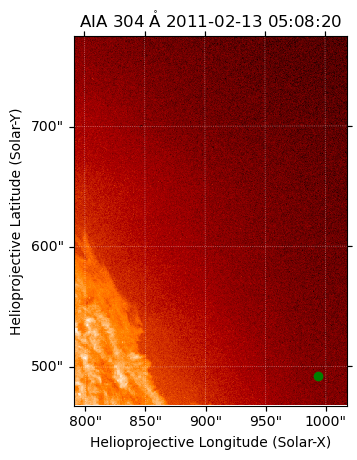

In [92]:
fig = plt.figure()
ax = fig.add_subplot(projection=cutout_map)
image = cutout_map.plot(axes=ax)
with frames.Helioprojective.assume_spherical_screen(cutout_map.observer_coordinate):
    ax.plot_coord(rectangle_center_coord, marker='o', color='green')

plt.show()

In [23]:
vars(cutout_map)

{'_data': array([[ 97, 122, 112, ...,   5,   8,   7],
        [113, 137, 124, ...,   8,  12,   4],
        [107, 119, 143, ...,   7,   8,   4],
        ...,
        [ 11,   9,   7, ...,   2,   3,   2],
        [ 13,   8,   8, ...,   3,   3,   4],
        [  8,  13,   7, ...,   1,   6,   5]], dtype=int16),
 '_mask': None,
 '_wcs': None,
 '_meta': MetaDict([('simple', True),
           ('bitpix', 16),
           ('naxis', 2),
           ('naxis1', 379),
           ('naxis2', 512),
           ('t_rec', '2011-02-13T05:08:14.000'),
           ('wavelnth', 304),
           ('date', '2023-11-30T21:56:50.000'),
           ('fsn', 20678795),
           ('exptime', 2.9021610000000004),
           ('quality', 0),
           ('lvl_num', 1.0),
           ('origin', 'SDO/JSOC-SDP'),
           ('telescop', 'SDO/AIA'),
           ('instrume', 'AIA_4'),
           ('date-obs', '2011-02-13T05:08:20.124'),
           ('t_obs', '2011-02-13T05:08:21.575'),
           ('camera', 4),
           ('img_type',

In [32]:
aia_pixel_scale = 0.5*(cutout_map.scale[0]+cutout_map.scale[1])
aia_pixel_scale

<Quantity 0.60016501 arcsec / pix>

In [62]:
ref_coordinates=[cutout_map.reference_coordinate.Tx, cutout_map.reference_coordinate.Ty]

In [63]:
ref_pix = cutout_map.reference_pixel

In [66]:
coordinate_bottom_x = -1*ref_pix[0]*aia_pixel_scale + ref_coordinates[0]
coordinate_bottom_y = -1*ref_pix[1]*aia_pixel_scale + ref_coordinates[1]

In [67]:
print(coordinate_bottom_x)
print(coordinate_bottom_y)

789.613 arcsec
470.181 arcsec


In [68]:
jet_box_center

[<Quantity 993.97020959 arcsec>, <Quantity 492.12942059 arcsec>]

In [94]:
time_distance_array, time_array, distance_array = compute_time_distance('sjh_2011-02-13T05_1', 304*u.angstrom)

number of files for this time-distance plot:
155
The 883 JetCluster objects are imported from exports/Jet_clusters_3.0_2.0.paperID.json.


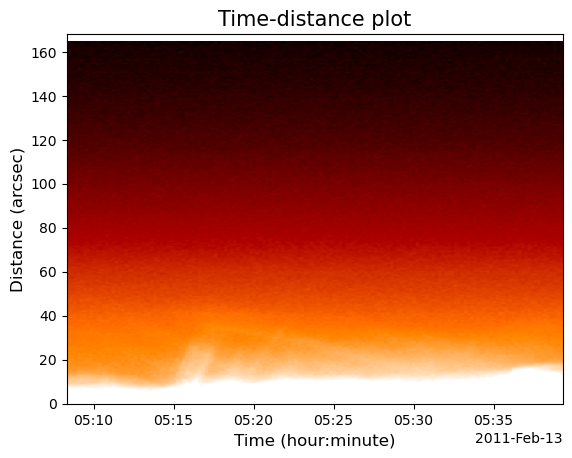

In [103]:
plot_time_distance(time_distance_array, time_array, distance_array, vfactor=0.6)

In [97]:
distance_array.min()

0.0

In [108]:
rectangle_width_inpix = box_width/aia_pixel_scale
rectangle_length_inpix = box_length/aia_pixel_scale

In [113]:
rectangle_center_coord.Tx.value

993.9702095852593

In [114]:
rectangle_xx = px + 0.5*rectangle_length_inpix.value*np.array([-1,1])
rectangle_yy = py + 0.5*rectangle_width_inpix.value*np.array([-1,1])

C:\Users\sophie.musset\AppData\Local\Temp\ipykernel_35212\1012004302.py:4: RuntimeWarning: divide by zero encountered in log
  ax1.imshow(np.log(img), cmap='sdoaia304', origin="lower")
C:\Users\sophie.musset\AppData\Local\Temp\ipykernel_35212\1012004302.py:4: RuntimeWarning: invalid value encountered in log
  ax1.imshow(np.log(img), cmap='sdoaia304', origin="lower")


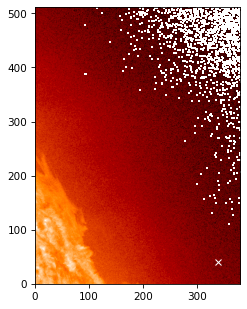

In [115]:
fig = plt.figure(dpi=75)
ax1 = fig.subplots(1, 1)
img = data_array
ax1.imshow(np.log(img), cmap='sdoaia304', origin="lower")
ax1.plot(px,py, marker='x',c='white')

ax.plot(rectangle_xx, np.array([rectangle_yy[0],rectangle_yy[0]]),
        color='white')
ax.plot(rectangle_xx, np.array([rectangle_yy[1],rectangle_yy[1]]),
        color='white')
ax.plot(np.array([rectangle_xx[0],rectangle_xx[0]]), rectangle_yy,
        color='white')
ax.plot(np.array([rectangle_xx[1],rectangle_xx[1]]), rectangle_yy,
        color='white')

plt.show()

In [116]:
rectangle_xx

array([102.72705169, 573.88226113])

In [117]:
rectangle_yy

array([ 4.98430935, 75.42548615])